<center style='font-size: 36px'><b> PREDICTING HOUSE PRICES WITH MULTIPLE LINEAR REGRESSION </b></center>
<center style="font-size:24px"> Quynh Nguyen - BDS24  </center><br><br>

<h3> TABLE OF CONTENT </h3>

<div class="toc">
    <ul style="list-style:none">
        <li><a href="#introduction" class="anchor">I. Introduction </a>
            <ul style="list-style:none">
                <li><a href="#background">a. Background</li>
                <li><a href="#import">b. Import</li>
                <li><a href="#dataset">c. Dataset</li>
            </ul>
        </li>
        <li><a href="#EDA">II. Exploratory Data Analysis and Data Preparation</li>
            <ul style="list-style:none">
                <li><a href="#overview">a. Overview</li>
                <li><a href="#distribution">b. Distribution</li>
                <li><a href="#boxplots">c. Boxplot</li>
                <li><a href="#correlation">d. Correlation</li>
            </ul>
        <li><a href="#regression">III. Regression Analysis</li>
            <ul style="list-style:none">
                <li><a href="#analysis_prepare">a. Prepare Testing and Training Data</li>
                <li><a href="#fitmodel">b. Fit the model</li>                
                <li><a href="#hypothesis">c. Hypothesis Testing</li>
                <li><a href="#evaluation">d. Model Evaluation</li>
                <li><a href="#prediction">e. Prediction</li>
            </ul>
        <li><a href="#conclusion">IV. Conclusion </a>


<a id='introduction'></a>

### <h3> I. Introduction </h3>

<h5 id="background"> a. Background </h5>


House prices are rising rapidly and hard to predict. Many people consider houses not only accommodations but also a profitable source of investment. However, the risk still exists, especially real-estate bubble. Therefore, to reduce this risk, it is crucial to have a data-driven approach to price a house. 

House value is dependent on many factors: location, functions, area, neighborhoods, utility, etc. This project only takes into account the house features itself, such as number of rooms, garage area, floor area, and a few more, for the sense of simplicity and data availability. The method to model this prediction is multiple linear regression (MLR) - a statistical technique that uses two or more independent variables to predict the outcome of a dependent variable. [1]

<h5 id="import"> b. Import </h5>

To prepare for this analysis, some libraries is needed:

In [2]:
#For basis analysis
import pandas as pd
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for training the data
import statsmodels.api as sm
from sklearn import model_selection

Next, the dataset used in this analysis is also imported:

In [3]:
df = pd.read_csv('train.csv')
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h5 id="dataset"> c. Dataset </h5>

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset above contains many columns, including both categorical and numeric values. Because we are doing regression, only numeric values are considered. Besides, for simplicity, only 9 attributes are chosen to train the model based on the common sense about the crucial factors on house prices.

**Independent Variables**

- TotalBsmtSF: Total square feet of basement area (m2)
- 1stFlrSF: First Floor square feet (m2)
- 2ndFlrSF: Second floor square feet (m2)
- LowQualFinSF: Low quality finished square feet (all floors) (m2)
- GrLivArea: Above grade (ground) living area square feet (1stFlrSF + 2ndFlrSF) (m2)
- WoodDeckSF: Wood deck area in square feet (m2)
- GarageArea: Size of garage in square feet (m2)
- PoolArea: Pool area in square feet (USD)
- MiscVal: $Value of miscellaneous feature (USD)

**Dependent Variable**: SalePrice (USD)

In [4]:
columns = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','GarageArea','PoolArea','MiscVal','SalePrice']
df = df[columns].astype("float64")

The training data would look like this: 

In [5]:
df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,GarageArea,PoolArea,MiscVal,SalePrice
0,856.0,856.0,854.0,0.0,1710.0,0.0,548.0,0.0,0.0,208500.0
1,1262.0,1262.0,0.0,0.0,1262.0,298.0,460.0,0.0,0.0,181500.0
2,920.0,920.0,866.0,0.0,1786.0,0.0,608.0,0.0,0.0,223500.0
3,756.0,961.0,756.0,0.0,1717.0,0.0,642.0,0.0,0.0,140000.0
4,1145.0,1145.0,1053.0,0.0,2198.0,192.0,836.0,0.0,0.0,250000.0


### <h3 id='EDA'> II. Exploratory Data Analysis and Data Preparation </h3>

In [6]:
#Preparation to visualize the data
bin_num = 10;
n=2;
m=5;
colors = {'TotalBsmtSF':'#FFD32D','1stFlrSF':'#008E89','2ndFlrSF':'#085E7D','LowQualFinSF':'#084594','WoodDeckSF':'#064594','GrLivArea':'#333C83','GarageArea':'#FDAF75','PoolArea':'#5584AC','MiscVal':'#22577E','SalePrice':'#FD5D5D'}
sns.set_theme()

<h5 id="overview"> a. Overview </h5>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalBsmtSF   1460 non-null   float64
 1   1stFlrSF      1460 non-null   float64
 2   2ndFlrSF      1460 non-null   float64
 3   LowQualFinSF  1460 non-null   float64
 4   GrLivArea     1460 non-null   float64
 5   WoodDeckSF    1460 non-null   float64
 6   GarageArea    1460 non-null   float64
 7   PoolArea      1460 non-null   float64
 8   MiscVal       1460 non-null   float64
 9   SalePrice     1460 non-null   float64
dtypes: float64(10)
memory usage: 114.2 KB


In [8]:
df.describe()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,GarageArea,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1057.429452,1162.626712,346.992466,5.844521,1515.463699,94.244521,472.980137,2.758904,43.489041,180921.195890
std,438.705324,386.587738,436.528436,48.623081,525.480383,125.338794,213.804841,40.177307,496.123024,79442.502883
min,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,334.500000,0.000000,0.000000,129975.000000
50%,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,480.000000,0.000000,0.000000,163000.000000
75%,1298.250000,1391.250000,728.000000,0.000000,1776.750000,168.000000,576.000000,0.000000,0.000000,214000.000000
max,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,857.000000,1418.000000,738.000000,15500.000000,755000.000000


**Key Obsevations**
- The dataset contains 1460 entries and 10 columns
- All columns in the dataset do not contain null values
- The datatype of all values in the dataset is float
- About Descriptive statistics, we will focus on the house prices in the "SalePrice" column:
    + The value is in the range from 349,000 USD to 755,000 USD
    + The mean is: 180,921 USD; The median is: 163,000 USD, this dataset is right-skewed.

<h5 id="distribution"> b. Distribution </h5>

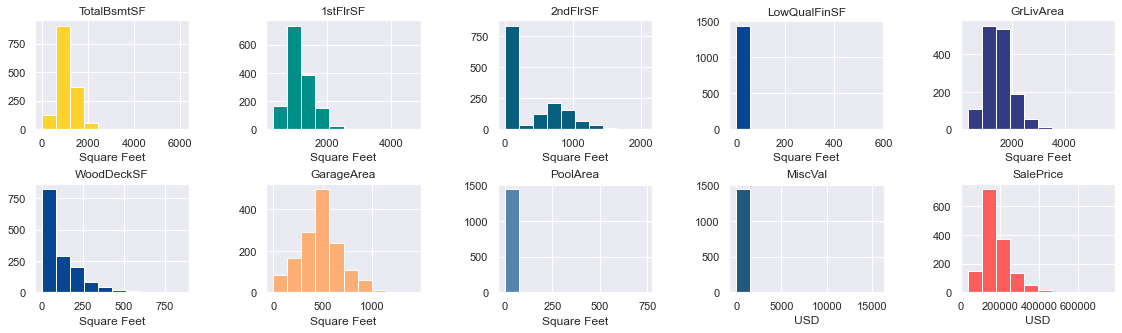

In [9]:
fig, axes = plt.subplots(n,m,figsize=(30,5))
plt. subplots_adjust(left=0.5,right=1, wspace=0.5,hspace=0.5)
for i in range(len(columns)):
    axes.flat[i].hist(df.iloc[:,i],bins=bin_num,color=colors[columns[i]])
    axes.flat[i].set_title(columns[i])
    if i==8 or i==9:
        axes.flat[i].set_xlabel("USD")
    else:
        axes.flat[i].set_xlabel("Square Feet")

**Key Obsevations**
- **TotalBsmlSF, 1stFlrSf, GrLivArea, GarageArea, SalePrice**: Right-skewed distributed
- The majority of values in **2ndFlrSF**, **LowQualFinSF**, **PoolArea**, **MiscVal**,**WoodDeckSF** is zero or close to zero, which imply many houses do not or have an inconsiderable value of the second floor, low-quality area, pool, valuable miscellaneous, and wood deck area respectively.

<h5 id="boxplots"> c. Boxplots </h5>

Text(0, 0.5, 'Square Feet')

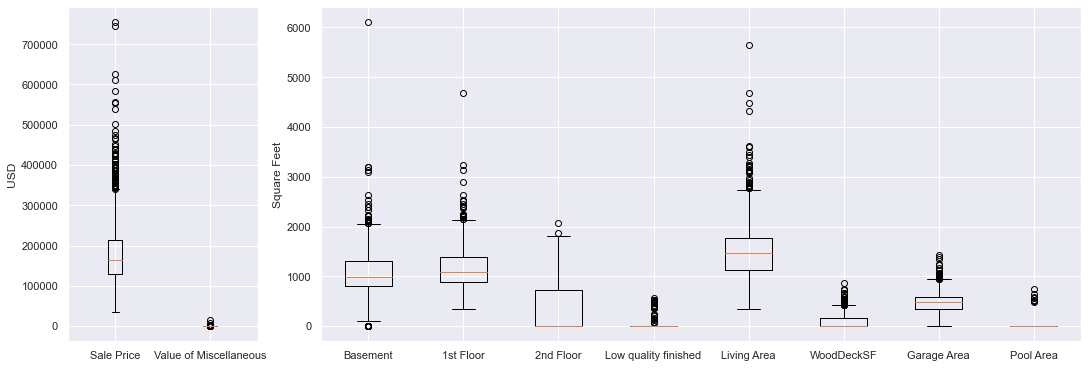

In [10]:
fig = plt.figure(figsize=(15,5), constrained_layout=True)
spec = fig.add_gridspec(10, 10)


axes1 = fig.add_subplot(spec[0:10, 0:2])
axes1.boxplot(df[['SalePrice','MiscVal']],labels=['Sale Price','Value of Miscellaneous'])
axes1.set_ylabel('USD')

axes2 = fig.add_subplot(spec[0:10,2:10])
axes2.boxplot(df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','GarageArea','PoolArea']], labels=['Basement','1st Floor','2nd Floor','Low quality finished','Living Area','WoodDeckSF','Garage Area','Pool Area'])
axes2.set_ylabel('Square Feet')

**Key Obsevations:**

All attributes of this dataset contain outliers. Therefore, to make sure that outliers doesn't affect the analysis, we will eliminate every records that contain outliers in any attribute. The rule to define an outlier is: 

   + X is an outlier when x satisfies: x > Q3 + 1.5IQR   or  x< Q1 - 1.5QR

In [11]:
summary = df.describe()
IQR = summary.iloc[6] - summary.iloc[4]
upperlimit = summary.iloc[6] + 1.5*IQR
lowerlimit = summary.iloc[4] - 1.5*IQR
df = df[~((df < lowerlimit)|(df > upperlimit)).any(axis=1)]

Check the box plot again:

Text(0, 0.5, 'Square Feet')

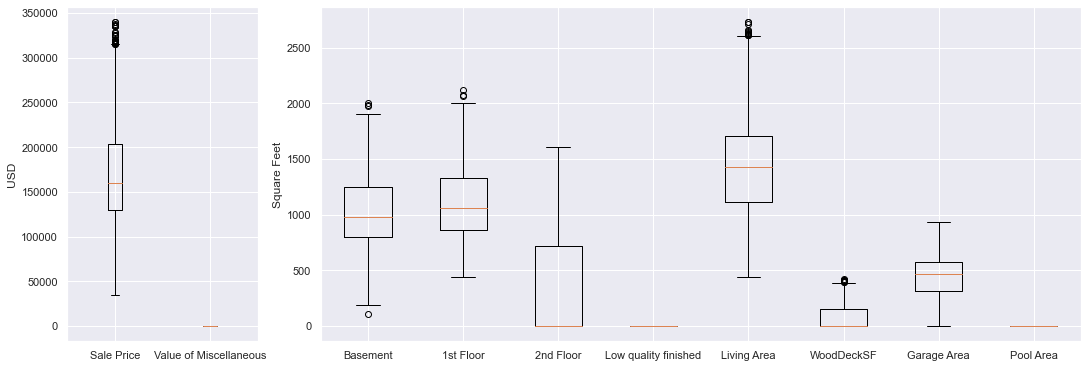

In [12]:
fig = plt.figure(figsize=(15,5), constrained_layout=True)
spec = fig.add_gridspec(10, 10)


axes1 = fig.add_subplot(spec[0:10, 0:2])
axes1.boxplot(df[['SalePrice','MiscVal']],labels=['Sale Price','Value of Miscellaneous'])
axes1.set_ylabel('USD')

axes2 = fig.add_subplot(spec[0:10,2:10])
axes2.boxplot(df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','GarageArea','PoolArea']], labels=['Basement','1st Floor','2nd Floor','Low quality finished','Living Area','WoodDeckSF','Garage Area','Pool Area'])
axes2.set_ylabel('Square Feet')

The number of outliers is reduced significantly so I assumed this is acceptable for further analysis.

<h5 id="correlation"> d. Correlation </h5>

Text(0, 0.5, ' Sale Prices (USD)')

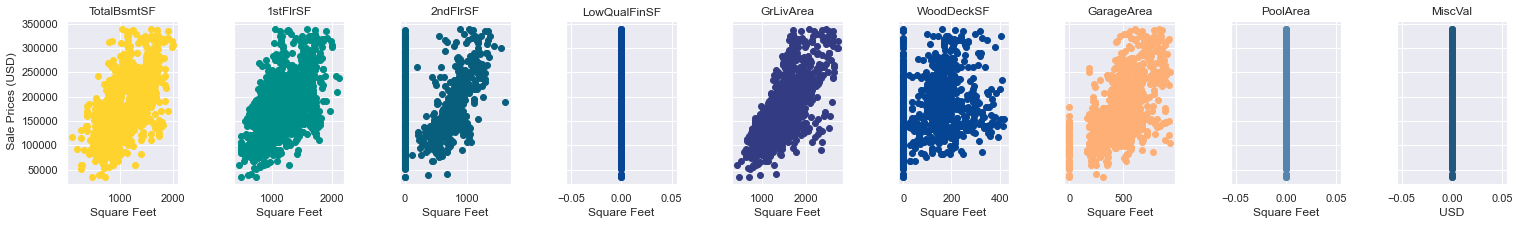

In [13]:
fig, axes = plt.subplots(1,9,figsize=(40,3),sharey=True)
plt. subplots_adjust(left=0.5,right=1, wspace=0.5,hspace=0.5)

for i in range(len(columns)-1):
    axes.flat[i].scatter(df.iloc[:,i],df['SalePrice'],color=colors[columns[i]])
    axes.flat[i].set_title(columns[i])
    if i==8 or i==9:
        axes.flat[i].set_xlabel("USD")
    else:
        axes.flat[i].set_xlabel("Square Feet")

axes[0].set_ylabel(" Sale Prices (USD)")

<AxesSubplot:>

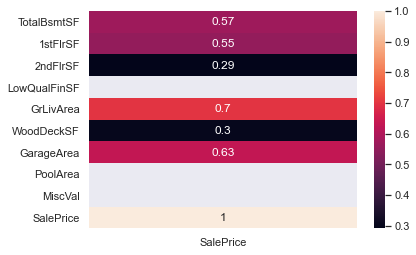

In [14]:
n = df.corr()[['SalePrice']]
sns.heatmap(n, annot=True)

**Key Obsevations**
- The corelation between **LowQualFinSF, PoolArea, MiscVal** and the SalePrice in this dataset is approximately 0. Therefore, these attributes can be eliminated from the model because there is no relationship detected between these columns and house prices.
- **TotalBsmtSF, 1stFlrSF,GrLivArea,GarageArea** have fairly good correlations with the house prices. The attributes is expected to strongly influence the target variable.
- **2ndFlrSf** and **WoodDeckSF** have low correlations but still included in this analysis to increase the accuracy of the model

In [15]:
df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','GarageArea']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TotalBsmtSF  1236 non-null   float64
 1   1stFlrSF     1236 non-null   float64
 2   2ndFlrSF     1236 non-null   float64
 3   GrLivArea    1236 non-null   float64
 4   WoodDeckSF   1236 non-null   float64
 5   GarageArea   1236 non-null   float64
dtypes: float64(6)
memory usage: 67.6 KB


After the data preparation process, the row is reduced to 1236 entries while the columns is reduced to 6.

**The graph below show the scatterplot of SalePrice and all selected attributes with the regression line:**

c:\Users\Hi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


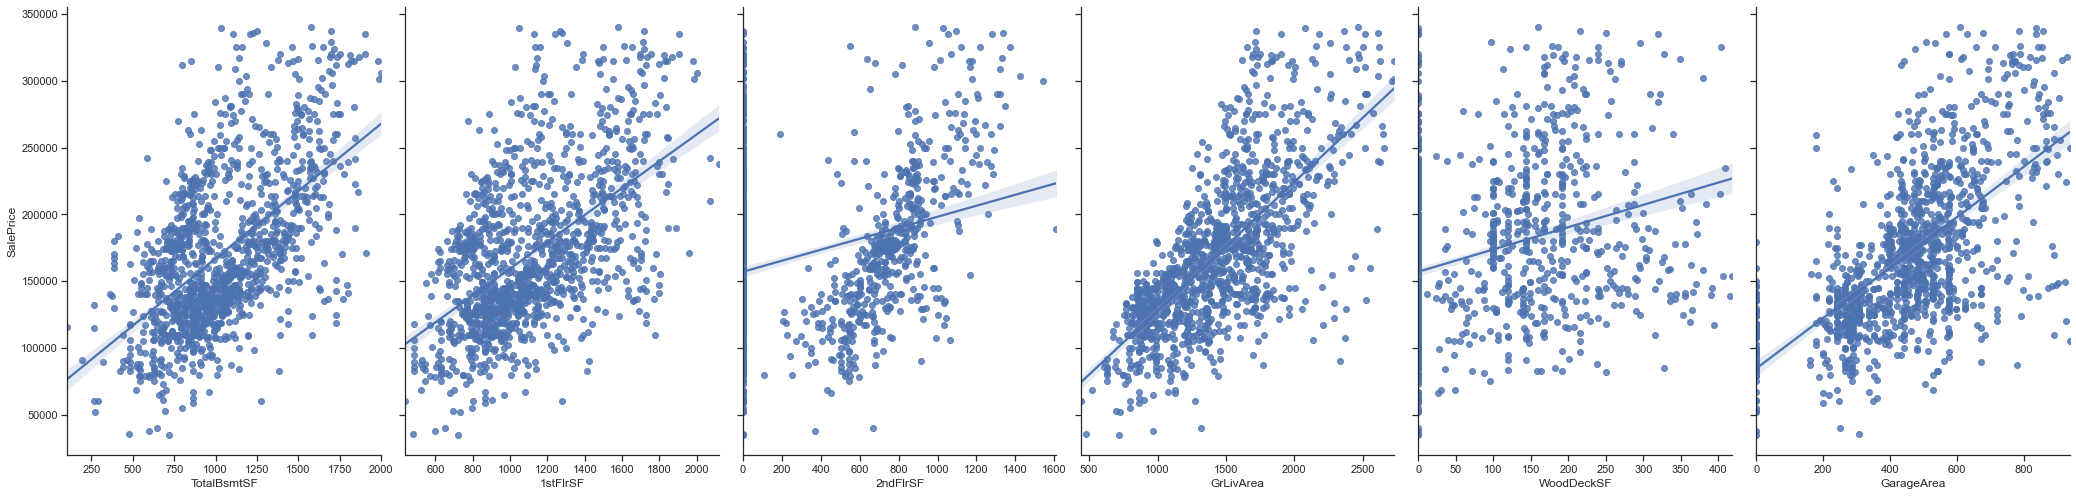

In [16]:
sns.set(style="ticks", color_codes=True)
img = sns.pairplot(df, x_vars=['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','GarageArea'], y_vars='SalePrice', size=7, aspect=0.7, kind='reg')

### <h3 id='regression'> III. Regression Analysis</h3>

<h5 id="analysis_prepare"> a. Prepare Testing and Training Data </h5>

In [17]:

independent = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','GarageArea']
target = ['SalePrice']
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[independent],df[target],test_size=0.2)


<h5 id="fitmodel"> b. Fit the model </h5>

In Linear Regression, coefficients are estimated using the least squares criterion, in which we try to minimize the sum of squared residuals. Multiple Linear Regression simply includes multiple features. It takes the following form: 

> y = $β_{0}$ + $β_{1}$ $x_{1}$ + $β_{2}$ $x_{2}$ + ...+ $β_{n}$ $x_{n}$ 

Each  x  represents a different feature, and each feature has its own coefficient. In this case:

> y = $β_{0}$ + $β_{1}$ $x_{1}$ + $β_{2}$ $x_{2}$ +  $β_{3}$ $x_{3}$ +  $β_{4}$ $x_{4}$ +  $β_{5}$ $x_{5}$ +  $β_{6}$ $x_{6}$ 

$x_{1}$ , $x_{2}$ , $x_{3}$ , $x_{4}$ , $x_{5}$ , $x_{6}$ represent for 'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','GarageArea' respectively.



In [18]:
X = x_train
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

In [19]:
round(model.params,2)

const         -19123.27
TotalBsmtSF       70.79
1stFlrSF           6.72
2ndFlrSF          31.40
GrLivArea         38.13
WoodDeckSF        63.74
GarageArea        86.18
dtype: float64

The form of the model is:

>  $$ y=-14271.48 + 63.56 x_1+ 7.63 x_2+  29.64 x_3+  37.28 x_4+  67.40 x_5+  91.12 x_6 $$

More information about this model is shown below:

In [20]:
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     494.9
Date:                Sun, 15 May 2022   Prob (F-statistic):          2.20e-265
Time:                        09:35:41   Log-Likelihood:                -11621.
No. Observations:                 988   AIC:                         2.325e+04
Df Residuals:                     982   BIC:                         2.328e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.912e+04   4258.227     -4.491      0.000   -2.75e+04   -1.08e+04
TotalBsmtSF    70.7937      6.231     11.361      0.000      58.566      83.022
1stFlrSF        6.7231      4.221      1.593      0.112      -1.561      15.007
2ndFlrSF       31.4020      2.625     11.961      0.000      26.250      36.554
GrLivArea      38.1251      2.383     16.000      0.000      33.449      42.801
WoodDeckSF     63.7440      9.547      6.677      0.000      45.009      82.479
GarageArea     86.1840      6.209     13.881      0.000      74.000      98.368
==============================================================================
Omnibus:                       58.674   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.754
Skew:                          -0.314   Prob(JB):                     2.24e-32
Kurtosis:                       4.774   Cond. No.                     3.92e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.2e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h5 id="hypothesis"> c. Hypothesis Testing </h5>


- Null Hypothesis: 

> $β_{1}$ = $β_{2}$   =  $β_{3}$ +  $β_{4}$ =  $β_{5}$ =  $β_{6}$ = 0

<i> Imply: There is no relationship between "TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","WoodDeckSF","GarageArea" and "SalePrice". </i>


- Alternative Hypothesis:


> $β_{1}$ ≠ $β_{2}$   ≠  $β_{3}$ ≠  $β_{4}$ ≠  $β_{5}$ ≠  $β_{6}$ ≠ 0

<i> Imply: There is relationships between "TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","WoodDeckSF","GarageArea" and "SalePrice". </i>

To test the hypothesis, the p-value -a representation the probability that the coefficient is actually zero - is used:

In [21]:
model.pvalues

const          7.933932e-06
TotalBsmtSF    3.440303e-28
1stFlrSF       1.115671e-01
2ndFlrSF       7.057901e-31
GrLivArea      2.230546e-51
WoodDeckSF     4.081140e-11
GarageArea     3.920592e-40
dtype: float64

The coefficients of "TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","WoodDeckSF","GarageArea" are all **less than 0.05**. Therefore, we are reject the null hypothesis and conclude that:

**There are relationships between the area of basement, the area of first floor , the area of second floor, the area of ground living area, the area of wood deck, the area of garage and the price of house**

<h5 id="evaluation"> d. Model Evaluation </h5>

To evaluate a model, the overall fit of that model is considered. We use **R-squared value** - the proportion of variance in the observed data that is explained by the model. We expected to have high **R-squared value**  because it means that more variance is explained by the model.

In [22]:
model.rsquared

0.7159137043423227

**The R-Squared Value of this model is 0.71**. This is typically a good value for house prices prediction, due to the fact that we only take into account a few attributes of the original dataset.

Besides the R-squared value, we can use **Root Mean Squared Error (RMSE)** to evaluate the model. Other options are Mean Absolute Error (MAE) and Mean Squared Error (MSE). However, in this project, RMSE is used because it not only punishes large errors but also inteprets in "y" units.

The formula for RMSE is: 


$$ RMSE = \sqrt[2]{\frac{1}{n}\sum \limits _{i=1}^{n} ( y_i - \hat{y_i})^2} $$


In [23]:
X = x_test
X = sm.add_constant(X)
predictions = model.predict(X) 
from sklearn import metrics
print("The RMSE of the model is:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

The RMSE of the model is: 32424.27029862195


To understand the RMSE value in respect with the value range of the house price, this RMSE is normalized by this formula [2]:

$$ Normalized \: RMSE  =  \frac{RMSE}{HousePrice_{Max} - HousePrice_{Min}} $$ 


In [24]:
print("The normalized RMSE is:")
print(np.sqrt(metrics.mean_squared_error(y_test, predictions))/(y_test.max()-y_test.min()))

The normalized RMSE is:
SalePrice    0.10733
dtype: float64


This value is 0.11, which implies the differences between values predicted by a model and the actual value is only about 11% difference from the range of house prices. This is an appropriate number to use to predict the house price.

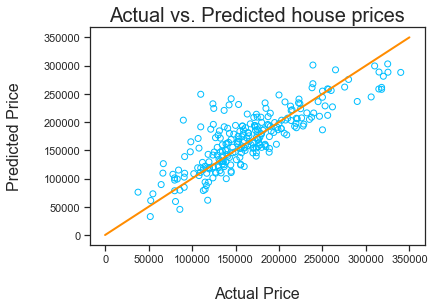

In [25]:
plt.figure()
plt.title("Actual vs. Predicted house prices", fontsize=20)
plt.scatter(y_test, predictions,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 350000], [0, 350000], "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### <h3 id='conclusion'> IV. Conclusion </h3>

This project demonstrates a project of analyzing data and building a statiscal model using multiple linear regression to predict house prices. 

We have chosen 9 attributes from the dataset of 1460 records, including: total square feet of basement area, first floor square feet, second floor square feet, low quality finished square feet, above grade living area square feet, wood deck area in square feet, size of garage in square feet, pool area in square feet and value of miscellaneous feature. After exploratory data analysis stage, we eliminated 3 attributes due to its no correlation to the target variable: low quality finished square feet, pool area in square feet, and value of miscellaneous feature. 

In the regression analysis stage, we apply the multiple regression model to produce the formula below:

>  $$ y=-14271.48 + 63.56 x_1+ 7.63 x_2+  29.64 x_3+  37.28 x_4+  67.40 x_5+  91.12 x_6 $$

With:
- $x_{1}$ : total square feet of basement area
- $x_{2}$ : first Floor square feet
- $x_{3}$ : second floor square feet
- $x_{4}$ : above grade living area square feet
- $x_{5}$ : wood deck area in square feet
- $x_{6}$ : size of garage in square feet

Although the input attributes are simplified, the model produces a fairly good prediction with R-square is 0.7032 and normalized RMSE is 0.11. These measures demonstrate that we can use this model to predict the house price in practice.


### <H3 id="References"> References </H3>

[1] https://corporatefinanceinstitute.com/resources/knowledge/other/multiple-linear-regression/

[2] https://www.statology.org/what-is-a-good-rmse/

[*] https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/